In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
sns.set()

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
file_path = Path('data/Microsoft_Stock/MSFT_Stock.csv')
file_path

WindowsPath('data/Microsoft_Stock/MSFT_Stock.csv')

In [96]:
df = pd.read_csv(file_path, sep=',')

In [98]:
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5000 non-null   object 
 1   open    5000 non-null   float64
 2   high    5000 non-null   float64
 3   low     5000 non-null   float64
 4   close   5000 non-null   float64
 5   volume  5000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 234.5+ KB


In [102]:
df.head()

,Date,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [29]:
df.isna().sum()

Date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [31]:
df.notna().sum()

Date      5000
open      5000
high      5000
low       5000
close     5000
volume    5000
dtype: int64

In [35]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

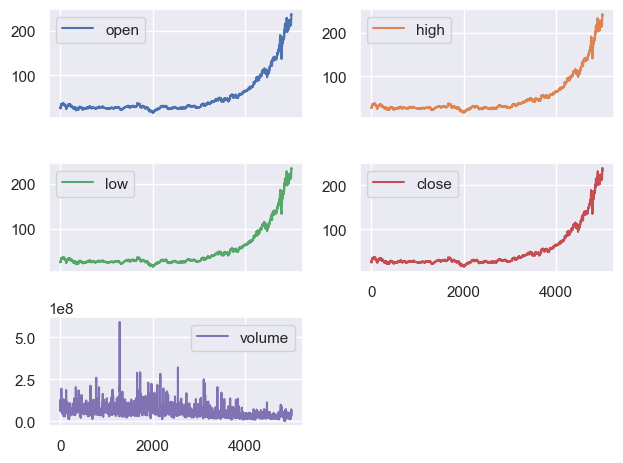

In [51]:
df.plot(subplots = True, layout=(3, 2))
plt.tight_layout(); plt.show()

<Axes: ylabel='Density'>

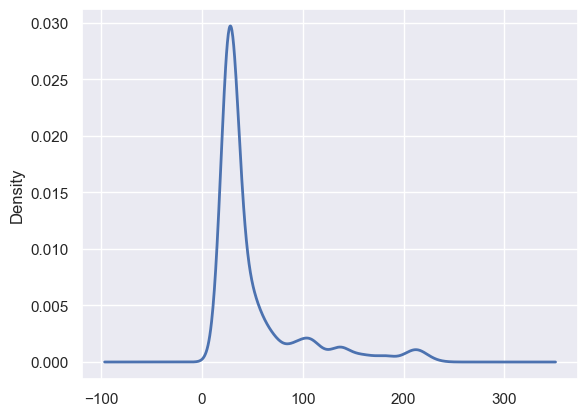

In [59]:
df.close.plot(kind = 'density', linewidth=2)

<Axes: >

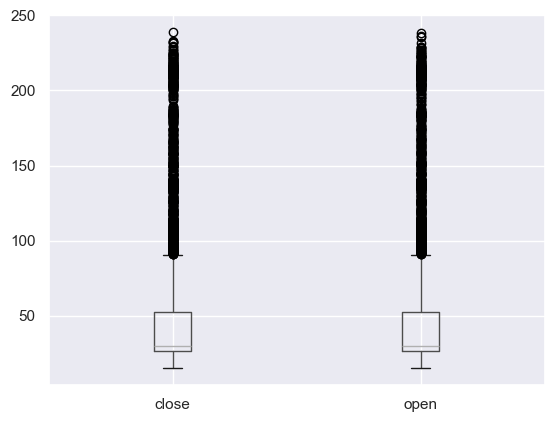

In [61]:
df[['close', 'open']].boxplot()

In [108]:
df.Date = pd.to_datetime(df.Date)

In [110]:
df.set_index('Date', inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2001-03-16 to 2021-01-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5000 non-null   float64
 1   high    5000 non-null   float64
 2   low     5000 non-null   float64
 3   close   5000 non-null   float64
 4   volume  5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.4 KB


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

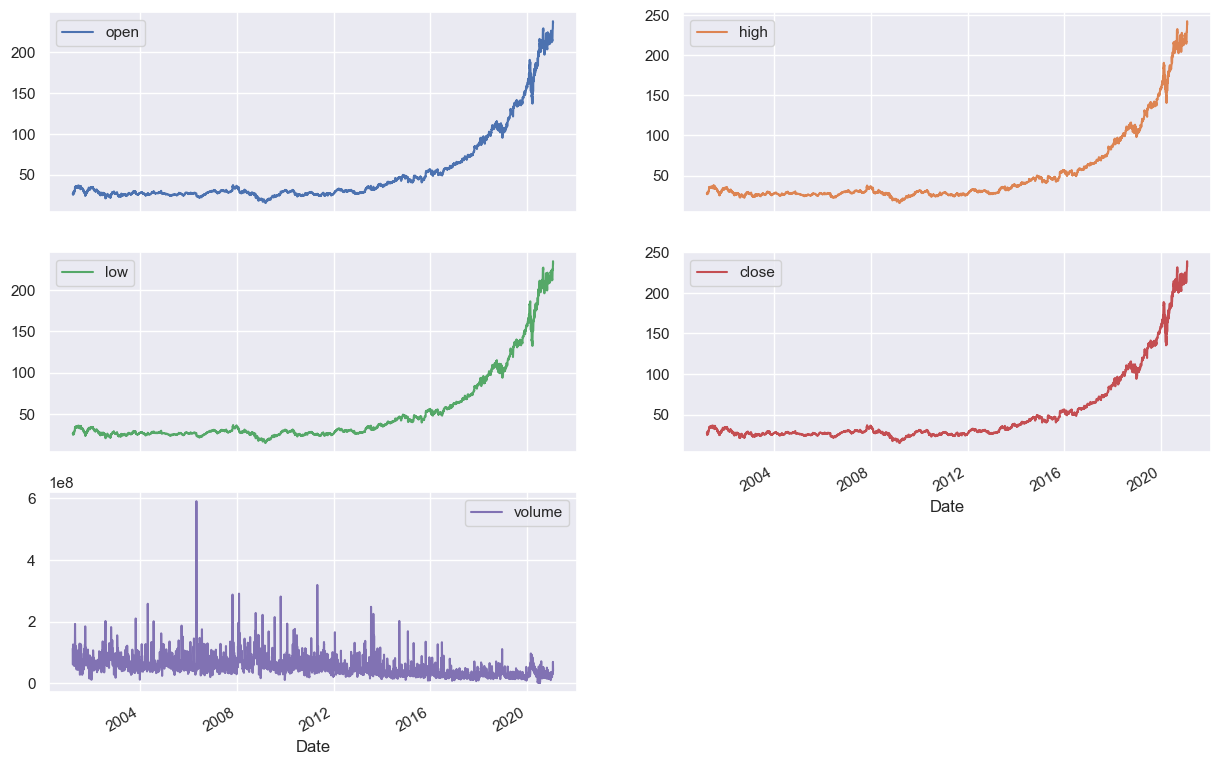

In [114]:
df.plot(subplots=True, layout=(3, 2), figsize=(15, 10))

In [116]:
df = df.resample('B').asfreq()

In [120]:
df.interpolate(inplace=True)

In [122]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5186 entries, 2001-03-16 to 2021-01-29
Freq: B
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5186 non-null   float64
 1   high    5186 non-null   float64
 2   low     5186 non-null   float64
 3   close   5186 non-null   float64
 4   volume  5186 non-null   float64
dtypes: float64(5)
memory usage: 243.1 KB


In [126]:
df.head()

,open,high,low,close,volume
Date,,,,,
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800.0
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400.0
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800.0
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600.0
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200.0


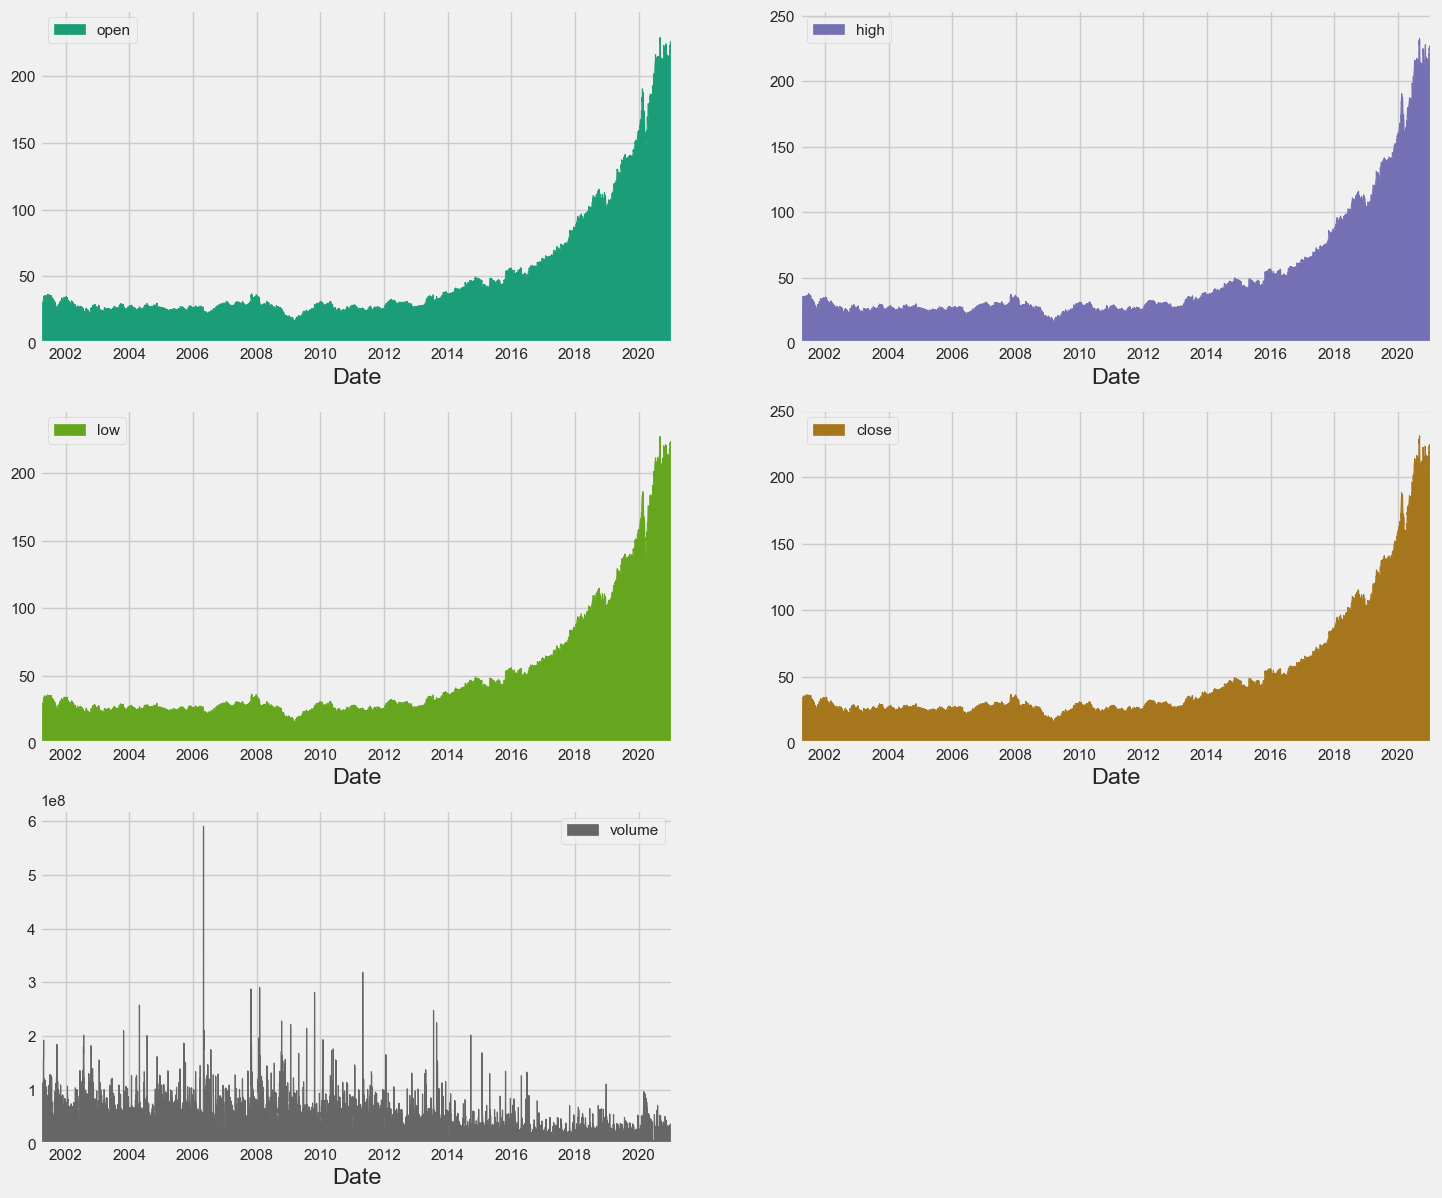

In [138]:
plt.style.use('fivethirtyeight')
df.plot.area(subplots=True,
       colormap = 'Dark2',
       linewidth = 0.5, 
       layout=(3, 2), 
       figsize = (16,  14),
       sharex = False, 
       sharey = False)
plt.show()

<Figure size 640x480 with 0 Axes>

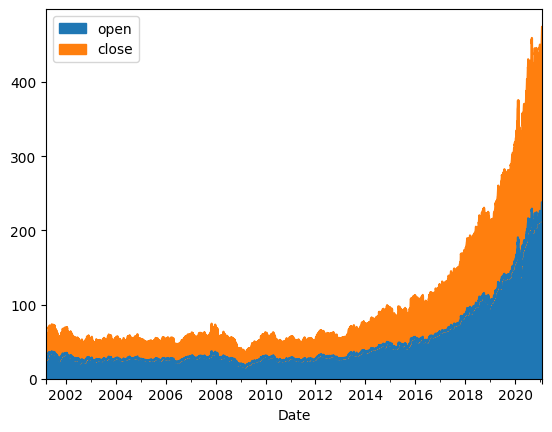

In [146]:
plt.style.use('default')
plt.tight_layout()
df[['open', 'close']].plot.area()
plt.show()

In [148]:
size = int(len(df)*0.8)
df_copy = df.copy()
df_train = df.iloc[:size]
df_test = df.iloc[size:]
df = df_train

In [152]:
df.tail()

,open,high,low,close,volume
Date,,,,,
2017-02-01,64.36,64.62,63.47,63.58,39671500.0
2017-02-02,63.25,63.41,62.75,63.17,45827000.0
2017-02-03,63.50,63.70,63.07,63.68,30301800.0
2017-02-06,63.50,63.65,63.14,63.64,19796400.0
2017-02-07,63.74,63.78,63.23,63.43,20277200.0


In [156]:
df_test.head()

,open,high,low,close,volume
Date,,,,,
2017-02-08,63.57,63.81,63.22,63.34,18096400.0
2017-02-09,63.52,64.44,63.32,64.06,22644400.0
2017-02-10,64.25,64.30,63.98,64.00,18170700.0
2017-02-13,64.24,64.86,64.13,64.72,22920100.0
2017-02-14,64.41,64.72,64.02,64.57,23108400.0


In [168]:
start_date = '2017-02-14'
end_date = '2021-01-29'

Text(0.5, 1.0, 'Close Stock Prices Train-Set')

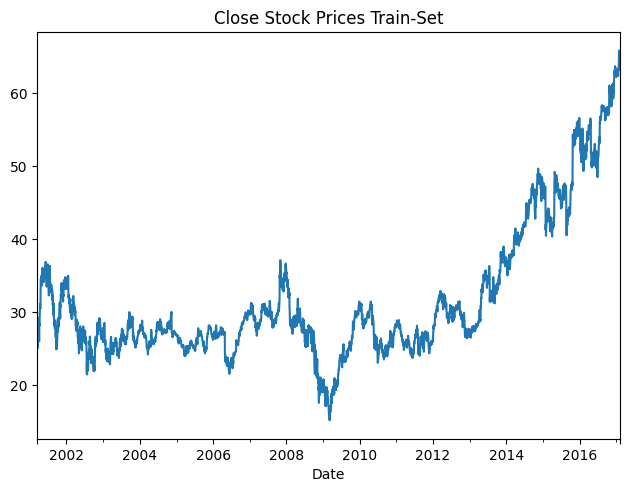

In [188]:
df.close.plot()
plt.tight_layout()
plt.title('Close Stock Prices Train-Set')

Text(0.5, 1.0, 'Close Stock Prices Test-Set')

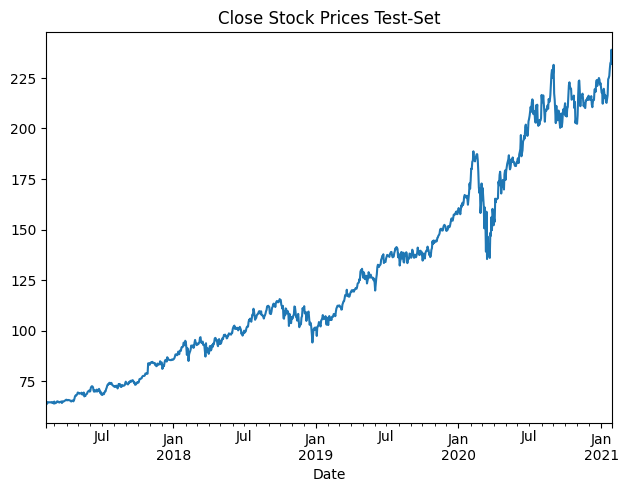

In [190]:
df_test.close.plot()
plt.tight_layout()
plt.title('Close Stock Prices Test-Set')

In [196]:
# As you can see our close variable is non-stationary

In [194]:
adfuller(df.close)

(0.39008620795923615,
 0.9811203923941129,
 7,
 4140,
 {'1%': -3.431930521551653,
  '5%': -2.8622383876911655,
  '10%': -2.567141758092371},
 6366.494388245405)

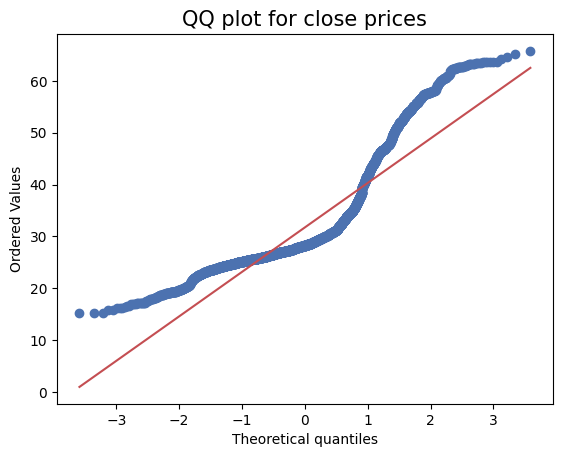

In [198]:
scipy.stats.probplot(df.close, plot = pylab)
plt.title('QQ plot for close prices', size=15)
plt.show()

<Axes: xlabel='close', ylabel='Density'>

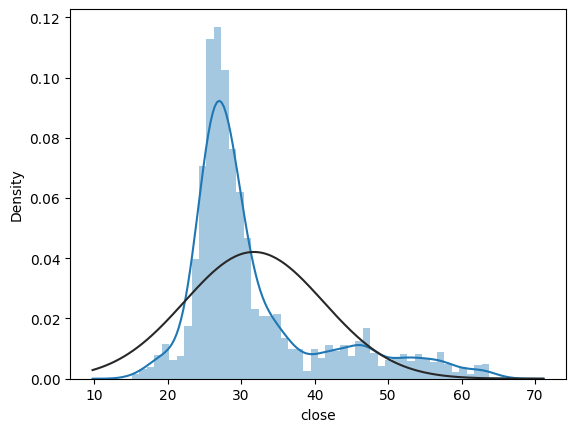

In [200]:
from numpy.random import normal, seed
from scipy.stats import norm
sns.distplot(df.close, fit=norm, kde=True)

In [238]:
df['differenced'] = df.close.diff().dropna()

In [240]:
adfuller(df.differenced.dropna())

(-20.449029925936944,
 0.0,
 10,
 4136,
 {'1%': -3.4319320510527267,
  '5%': -2.862239063354696,
  '10%': -2.567142117784963},
 6358.292902519896)

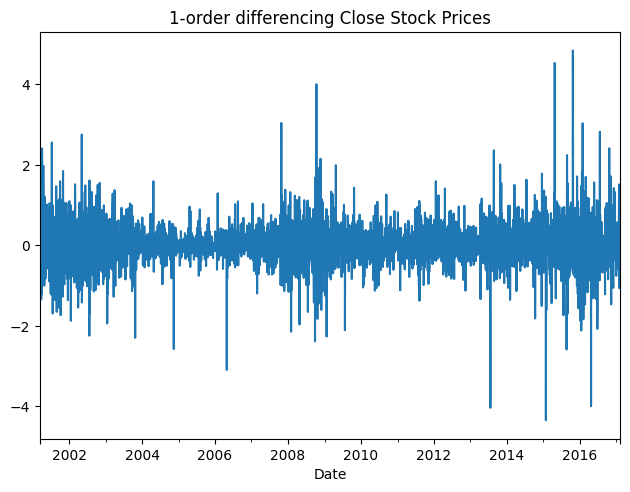

In [242]:
df.differenced.plot()
plt.tight_layout()
plt.title('1-order differencing Close Stock Prices')
plt.show()

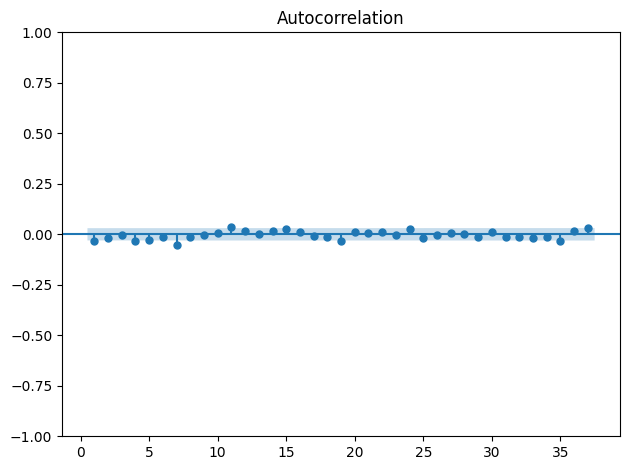

In [246]:
sgt.plot_acf(df.differenced[1:], zero=False)
plt.tight_layout()
plt.show()

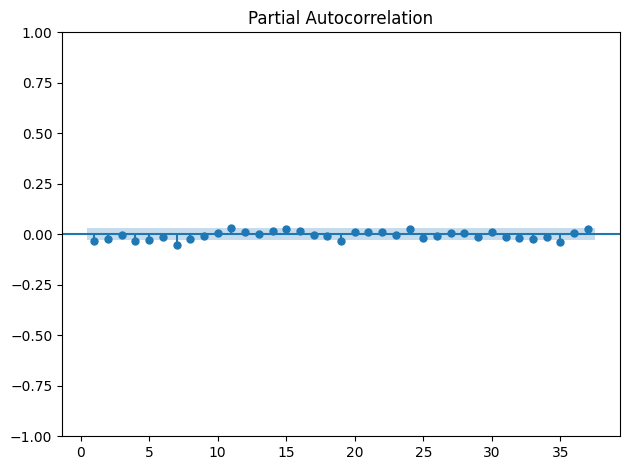

In [248]:
sgt.plot_pacf(df.differenced[1:], zero=False, method=('ols'))
plt.tight_layout()
plt.show()

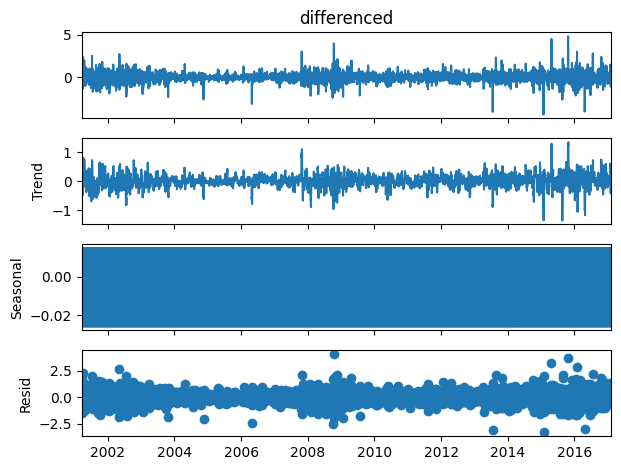

In [254]:
seasonal_additive = seasonal_decompose(df.differenced[1:], model = 'additive')
seasonal_additive.plot()
plt.show()

In [256]:
df['Returns'] = df.close.pct_change(1).mul(100)

In [260]:
adfuller(df.Returns[1:])

(-15.445615888577933,
 2.827528631807831e-28,
 18,
 4128,
 {'1%': -3.431935118952864,
  '5%': -2.862240418611436,
  '10%': -2.5671428392623077},
 16167.144867458153)

In [262]:
df = df.iloc[1:]

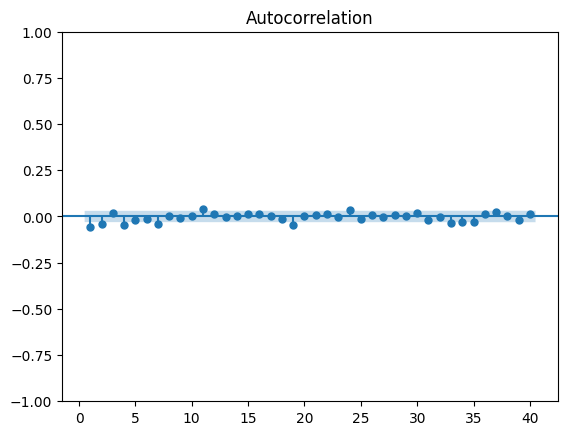

In [264]:
sgt.plot_acf(df.Returns, lags = 40, zero = False)
plt.show()

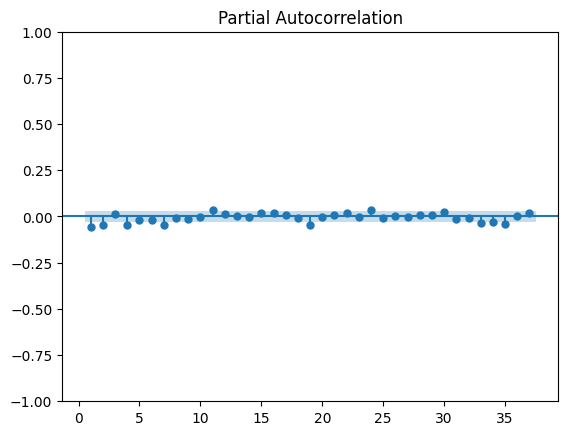

In [266]:
sgt.plot_pacf(df.Returns, zero = False, method = ('ols'))
plt.show()

In [268]:
import pmdarima as pm

In [270]:
results = pm.auto_arima(df.Returns)

In [272]:
results

ARIMA(order=(4, 0, 2), scoring_args={}, suppress_warnings=True)

In [276]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4147
Model:               SARIMAX(4, 0, 2)   Log Likelihood               -8189.986
Date:                Thu, 27 Mar 2025   AIC                          16395.971
Time:                        17:58:55   BIC                          16446.612
Sample:                    03-19-2001   HQIC                         16413.889
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.005      1.538      0.124      -0.002       0.019
ar.L1          1.6406      0.036     46.003      0.000       1.571       1.711
ar.L2         -0.8370      0.035    -23.971      0.0

In [296]:
model = SARIMAX(df.close, order=(4, 1, 2), seasonal_order=(0, 0, 0, 0))

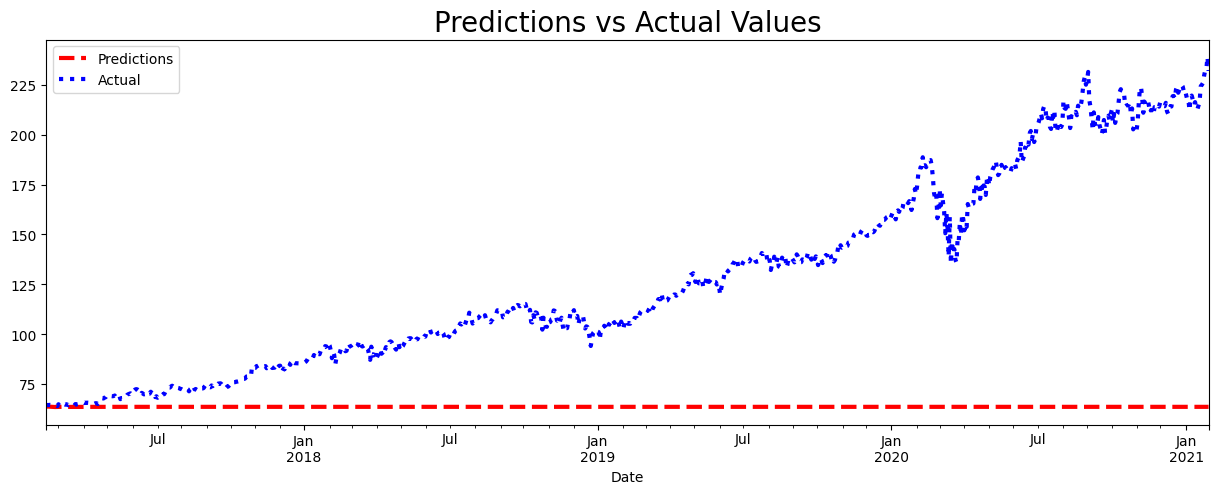

In [301]:
df_pred_results = model.fit().predict(start = start_date, end = end_date)
df_pred_results[start_date:end_date].plot(figsize=(15, 5), 
                color='red', linestyle='dashed', linewidth=3, label='Predictions')
df_test.close[start_date:end_date].plot(color='blue', linewidth=3, 
                label='Actual', linestyle=':')
plt.title('Predictions vs Actual Values', size=20)
plt.legend()
plt.show()

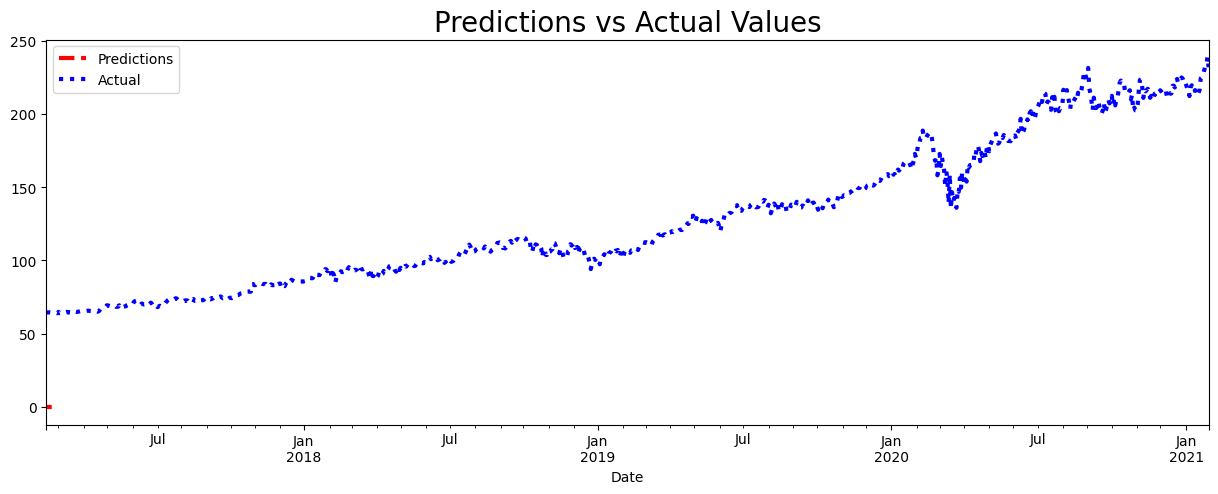

In [290]:
df_pred_results = results.predict(start = start_date, end = end_date)
df_pred_results[start_date:end_date].plot(figsize=(15, 5), 
                color='red', linestyle='dashed', linewidth=3, label='Predictions')
df_test.close[start_date:end_date].plot(color='blue', linewidth=3, 
                label='Actual', linestyle=':')
plt.title('Predictions vs Actual Values', size=20)
plt.legend()
plt.show()

In [303]:
df.memory_usage()

Index          33176
open           33176
high           33176
low            33176
close          33176
volume         33176
diff           33176
differenced    33176
Returns        33176
dtype: int64

In [305]:
df.memory_usage().sum()

298584